Analisis de consumo de netflix con Python


# 1. Importacion y carga de datos.

In [ ]:
from google.colab import files
datos = files.upload()

Saving NetflixViewingHistory.csv to NetflixViewingHistory.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(datos['NetflixViewingHistory.csv']))

In [ ]:
df

,Title,Date
0,Desde dentro: Episodio 1,29/7/23
1,"Amor a primera bestia: Temporada 2: Mick, el d...",29/7/23
2,Black Summer: Temporada 1: Cursos de verano,29/7/23
3,Proyecto Extracción,29/7/23
4,Jugando con fuego: Alemania: Vivan las vaginas,28/7/23
...,...,...
1317,Castlevania: Temporada 1: Necrópolis,14/5/21
1318,Castlevania: Temporada 1: Botella de bruja,14/5/21
1319,Lugares muertos: Muerte en aguas oscuras,14/5/21
1320,Oxígeno,14/5/21


# 2. Analisis Exploratorio

In [ ]:
#Cantidad de filas y columnas
df.shape

(1322, 2)

In [ ]:
#Descripcion de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1322 non-null   object
 1   Date    1322 non-null   object
dtypes: object(2)
memory usage: 20.8+ KB


In [ ]:
#Listar los 50 primeros
df.head(50)

,Title,Date
0,Desde dentro: Episodio 1,29/7/23
1,"Amor a primera bestia: Temporada 2: Mick, el d...",29/7/23
2,Black Summer: Temporada 1: Cursos de verano,29/7/23
3,Proyecto Extracción,29/7/23
4,Jugando con fuego: Alemania: Vivan las vaginas,28/7/23
5,Jugando con fuego: Alemania: ¡Alarma de provoc...,28/7/23
6,The Witcher: Temporada 3: Todos tienen un plan...,28/7/23
7,"Jugando con fuego: Alemania: Besos plus, menos...",27/7/23
8,"Jugando con fuego: Alemania: Si lo chupo, es mío",26/7/23
9,Jugando con fuego: Alemania: El sexómetro trop...,26/7/23


Vemos que existe un patron en el que diferentes partes se separan por dos puntos. Vamos a contar en cuantas partes distintas se separan nuestros contenidos.

In [ ]:
separacion_lista = df.Title.str.split(pat = ':', expand=False).to_frame()
separacion_lista

,Title
0,"[Desde dentro, Episodio 1]"
1,"[Amor a primera bestia, Temporada 2, Mick, e..."
2,"[Black Summer, Temporada 1, Cursos de verano]"
3,[Proyecto Extracción]
4,"[Jugando con fuego, Alemania, Vivan las vagi..."
...,...
1317,"[Castlevania, Temporada 1, Necrópolis]"
1318,"[Castlevania, Temporada 1, Botella de bruja]"
1319,"[Lugares muertos, Muerte en aguas oscuras]"
1320,[Oxígeno]


In [ ]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,"[Desde dentro, Episodio 1]",2
1,"[Amor a primera bestia, Temporada 2, Mick, e...",3
2,"[Black Summer, Temporada 1, Cursos de verano]",3
3,[Proyecto Extracción],1
4,"[Jugando con fuego, Alemania, Vivan las vagi...",3
...,...,...
1317,"[Castlevania, Temporada 1, Necrópolis]",3
1318,"[Castlevania, Temporada 1, Botella de bruja]",3
1319,"[Lugares muertos, Muerte en aguas oscuras]",2
1320,[Oxígeno],1


In [ ]:
#Contar los valores de la lista
separacion_lista.num_partes.value_counts()

2    579
3    462
1    170
4     99
5     12
Name: num_partes, dtype: int64

Vamos a analizar los titulos por numero de partes a ver si hay algun patron.

In [ ]:
separacion_lista.loc[separacion_lista.num_partes==1].head(10)

,Title,num_partes
3,[Proyecto Extracción],1
10,[El clon de Tyrone],1
35,[El Sr. Carrito y los caballeros templarios],1
37,[Bird Box Barcelona],1
46,[El último desafío],1
70,[Unos suegros de armas tomar],1
71,[¿...Y dónde están las rubias?],1
77,[La heredera de la mafia],1
78,[La Isla de la Fantasía],1
88,[La combinación perfecta],1


In [ ]:
separacion_lista.loc[separacion_lista.num_partes==2].head(10)

,Title,num_partes
0,"[Desde dentro, Episodio 1]",2
18,"[Hacia el lago, Episodio 8]",2
19,"[Hacia el lago, Episodio 7]",2
20,"[Hacia el lago, Episodio 6]",2
26,"[Chef cinco estrellas, Episodio 1]",2
27,"[Lo desconocido, La cueva de los huesos]",2
28,"[Nos vemos en mi 19.ª vida, ¿Yo soy la maripo...",2
29,"[Nos vemos en mi 19.ª vida, La incapacidad de...",2
30,"[Nos vemos en mi 19.ª vida, La agonía de sepa...",2
31,"[Nos vemos en mi 19.ª vida, El deseo de acaba...",2


In [ ]:
separacion_lista.loc[separacion_lista.num_partes==3].head(10)

,Title,num_partes
1,"[Amor a primera bestia, Temporada 2, Mick, e...",3
2,"[Black Summer, Temporada 1, Cursos de verano]",3
4,"[Jugando con fuego, Alemania, Vivan las vagi...",3
5,"[Jugando con fuego, Alemania, ¡Alarma de pro...",3
6,"[The Witcher, Temporada 3, Todos tienen un p...",3
7,"[Jugando con fuego, Alemania, Besos plus, me...",3
8,"[Jugando con fuego, Alemania, Si lo chupo, e...",3
9,"[Jugando con fuego, Alemania, El sexómetro t...",3
11,"[Jugando con fuego, Temporada 5, Detective d...",3
12,"[Jugando con fuego, Temporada 5, Un beso de ...",3


In [ ]:
separacion_lista.loc[separacion_lista.num_partes==4].head(10)

,Title,num_partes
52,"[¿Es pastel?, ¿Es pastel?, Segunda tanda, P...",4
53,"[¿Es pastel?, ¿Es pastel?, Segunda tanda, P...",4
54,"[¿Es pastel?, ¿Es pastel?, Segunda tanda, T...",4
99,"[¿Es pastel?, ¿Es pastel?, Segunda tanda, P...",4
100,"[¿Es pastel?, ¿Es pastel?, Segunda tanda, P...",4
101,"[¿Es pastel?, ¿Es pastel?, Segunda tanda, P...",4
102,"[¿Es pastel?, ¿Es pastel?, Segunda tanda, C...",4
103,"[¿Es pastel?, ¿Es pastel?, Segunda tanda, ¡...",4
158,"[Arnold, Miniserie, Parte 3, Estadounidense]",4
159,"[Arnold, Miniserie, Parte 2, Actor]",4


In [ ]:
separacion_lista.loc[separacion_lista.num_partes==5].head(10)

,Title,num_partes
501,"[Desaparecido, El otro lado, Missing, The O...",5
502,"[Desaparecido, El otro lado, Missing, The O...",5
503,"[Desaparecido, El otro lado, Missing, The O...",5
504,"[Desaparecido, El otro lado, Missing, The O...",5
505,"[Desaparecido, El otro lado, Missing, The O...",5
506,"[Desaparecido, El otro lado, Missing, The O...",5
507,"[Desaparecido, El otro lado, Missing, The O...",5
508,"[Desaparecido, El otro lado, Missing, The O...",5
509,"[Desaparecido, El otro lado, Missing, The O...",5
510,"[Desaparecido, El otro lado, Missing, The O...",5


# 3. Creacion de Variables.



Nuestro dataset tiene pocas variables, por lo tanto vamos a crear unas nuevas.

### 3.1 Variables a partir del Titulo

In [ ]:
import numpy as np

separacion_lista['tipo'] = np.where(separacion_lista.num_partes < 3, 'pelicula', 'serie')
separacion_lista

,Title,num_partes,tipo
0,"[Desde dentro, Episodio 1]",2,pelicula
1,"[Amor a primera bestia, Temporada 2, Mick, e...",3,serie
2,"[Black Summer, Temporada 1, Cursos de verano]",3,serie
3,[Proyecto Extracción],1,pelicula
4,"[Jugando con fuego, Alemania, Vivan las vagi...",3,serie
...,...,...,...
1317,"[Castlevania, Temporada 1, Necrópolis]",3,serie
1318,"[Castlevania, Temporada 1, Botella de bruja]",3,serie
1319,"[Lugares muertos, Muerte en aguas oscuras]",2,pelicula
1320,[Oxígeno],1,pelicula


In [ ]:
df = pd.concat([df, separacion_lista['tipo']], axis = 1)
#del(df['tipo']) eliminar columna
df

,Title,Date,tipo
0,Desde dentro: Episodio 1,29/7/23,pelicula
1,"Amor a primera bestia: Temporada 2: Mick, el d...",29/7/23,serie
2,Black Summer: Temporada 1: Cursos de verano,29/7/23,serie
3,Proyecto Extracción,29/7/23,pelicula
4,Jugando con fuego: Alemania: Vivan las vaginas,28/7/23,serie
...,...,...,...
1317,Castlevania: Temporada 1: Necrópolis,14/5/21,serie
1318,Castlevania: Temporada 1: Botella de bruja,14/5/21,serie
1319,Lugares muertos: Muerte en aguas oscuras,14/5/21,pelicula
1320,Oxígeno,14/5/21,pelicula


Vamos a dividir los titulos en sus diferentes niveles y generar nuevas variables.

In [ ]:
separacion_cols = df.Title.str.split(pat = ':', expand = True)
separacion_cols

,0,1,2,3,4
0,Desde dentro,Episodio 1,None,None,None
1,Amor a primera bestia,Temporada 2,"Mick, el dragón",None,None
2,Black Summer,Temporada 1,Cursos de verano,None,None
3,Proyecto Extracción,None,None,None,None
4,Jugando con fuego,Alemania,Vivan las vaginas,None,None
...,...,...,...,...,...
1317,Castlevania,Temporada 1,Necrópolis,None,None
1318,Castlevania,Temporada 1,Botella de bruja,None,None
1319,Lugares muertos,Muerte en aguas oscuras,None,None,None
1320,Oxígeno,None,None,None,None


In [ ]:
separacion_cols.columns = ['nivel1', 'nivel2', 'nivel3', 'nivel4', 'nivel5']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5
0,Desde dentro,Episodio 1,None,None,None
1,Amor a primera bestia,Temporada 2,"Mick, el dragón",None,None
2,Black Summer,Temporada 1,Cursos de verano,None,None
3,Proyecto Extracción,None,None,None,None
4,Jugando con fuego,Alemania,Vivan las vaginas,None,None
...,...,...,...,...,...
1317,Castlevania,Temporada 1,Necrópolis,None,None
1318,Castlevania,Temporada 1,Botella de bruja,None,None
1319,Lugares muertos,Muerte en aguas oscuras,None,None,None
1320,Oxígeno,None,None,None,None


In [ ]:
df = pd.concat([df, separacion_cols], axis = 1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
0,Desde dentro: Episodio 1,29/7/23,pelicula,Desde dentro,Episodio 1,None,None,None
1,"Amor a primera bestia: Temporada 2: Mick, el d...",29/7/23,serie,Amor a primera bestia,Temporada 2,"Mick, el dragón",None,None
2,Black Summer: Temporada 1: Cursos de verano,29/7/23,serie,Black Summer,Temporada 1,Cursos de verano,None,None
3,Proyecto Extracción,29/7/23,pelicula,Proyecto Extracción,None,None,None,None
4,Jugando con fuego: Alemania: Vivan las vaginas,28/7/23,serie,Jugando con fuego,Alemania,Vivan las vaginas,None,None
...,...,...,...,...,...,...,...,...
1317,Castlevania: Temporada 1: Necrópolis,14/5/21,serie,Castlevania,Temporada 1,Necrópolis,None,None
1318,Castlevania: Temporada 1: Botella de bruja,14/5/21,serie,Castlevania,Temporada 1,Botella de bruja,None,None
1319,Lugares muertos: Muerte en aguas oscuras,14/5/21,pelicula,Lugares muertos,Muerte en aguas oscuras,None,None,None
1320,Oxígeno,14/5/21,pelicula,Oxígeno,None,None,None,None


### 3.2 Variables a partir de la Fecha


Podemos extraer los diferentes componentes de una fecha para crear nuevas variables.

In [ ]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns = 'Date', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,fecha
0,Desde dentro: Episodio 1,pelicula,Desde dentro,Episodio 1,None,None,None,2023-07-29
1,"Amor a primera bestia: Temporada 2: Mick, el d...",serie,Amor a primera bestia,Temporada 2,"Mick, el dragón",None,None,2023-07-29
2,Black Summer: Temporada 1: Cursos de verano,serie,Black Summer,Temporada 1,Cursos de verano,None,None,2023-07-29
3,Proyecto Extracción,pelicula,Proyecto Extracción,None,None,None,None,2023-07-29
4,Jugando con fuego: Alemania: Vivan las vaginas,serie,Jugando con fuego,Alemania,Vivan las vaginas,None,None,2023-07-28
...,...,...,...,...,...,...,...,...
1317,Castlevania: Temporada 1: Necrópolis,serie,Castlevania,Temporada 1,Necrópolis,None,None,2021-05-14
1318,Castlevania: Temporada 1: Botella de bruja,serie,Castlevania,Temporada 1,Botella de bruja,None,None,2021-05-14
1319,Lugares muertos: Muerte en aguas oscuras,pelicula,Lugares muertos,Muerte en aguas oscuras,None,None,None,2021-05-14
1320,Oxígeno,pelicula,Oxígeno,None,None,None,None,2021-05-14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   1322 non-null   object        
 1   tipo    1322 non-null   object        
 2   nivel1  1322 non-null   object        
 3   nivel2  1152 non-null   object        
 4   nivel3  573 non-null    object        
 5   nivel4  111 non-null    object        
 6   nivel5  12 non-null     object        
 7   fecha   1322 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 82.8+ KB


In [ ]:
df.set_index('fecha', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
fecha,,,,,,,
2023-07-29,Desde dentro: Episodio 1,pelicula,Desde dentro,Episodio 1,None,None,None
2023-07-29,"Amor a primera bestia: Temporada 2: Mick, el d...",serie,Amor a primera bestia,Temporada 2,"Mick, el dragón",None,None
2023-07-29,Black Summer: Temporada 1: Cursos de verano,serie,Black Summer,Temporada 1,Cursos de verano,None,None
2023-07-29,Proyecto Extracción,pelicula,Proyecto Extracción,None,None,None,None
2023-07-28,Jugando con fuego: Alemania: Vivan las vaginas,serie,Jugando con fuego,Alemania,Vivan las vaginas,None,None
...,...,...,...,...,...,...,...
2021-05-14,Castlevania: Temporada 1: Necrópolis,serie,Castlevania,Temporada 1,Necrópolis,None,None
2021-05-14,Castlevania: Temporada 1: Botella de bruja,serie,Castlevania,Temporada 1,Botella de bruja,None,None
2021-05-14,Lugares muertos: Muerte en aguas oscuras,pelicula,Lugares muertos,Muerte en aguas oscuras,None,None,None


In [ ]:
def atributos_fechas(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [ ]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2023-07-29,Desde dentro: Episodio 1,pelicula,Desde dentro,Episodio 1,None,None,None,2023,July,29,Saturday
2023-07-29,"Amor a primera bestia: Temporada 2: Mick, el d...",serie,Amor a primera bestia,Temporada 2,"Mick, el dragón",None,None,2023,July,29,Saturday
2023-07-29,Black Summer: Temporada 1: Cursos de verano,serie,Black Summer,Temporada 1,Cursos de verano,None,None,2023,July,29,Saturday
2023-07-29,Proyecto Extracción,pelicula,Proyecto Extracción,None,None,None,None,2023,July,29,Saturday
2023-07-28,Jugando con fuego: Alemania: Vivan las vaginas,serie,Jugando con fuego,Alemania,Vivan las vaginas,None,None,2023,July,28,Friday
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-14,Castlevania: Temporada 1: Necrópolis,serie,Castlevania,Temporada 1,Necrópolis,None,None,2021,May,14,Friday
2021-05-14,Castlevania: Temporada 1: Botella de bruja,serie,Castlevania,Temporada 1,Botella de bruja,None,None,2021,May,14,Friday
2021-05-14,Lugares muertos: Muerte en aguas oscuras,pelicula,Lugares muertos,Muerte en aguas oscuras,None,None,None,2021,May,14,Friday


# 4. Analisis

Tiempo desde que tiene Netflix.

```
# Tiene formato de código
```



In [ ]:
from datetime import date

hoy = pd.Timestamp(date.today())
primer_dia = df.index.min()
tiempo = hoy - primer_dia

print("Llevas usando Netflix {0} dias.".format(tiempo.days))


Llevas usando Netflix 937 dias.


Dinero gastado hasta hoy

In [ ]:
coste_mensual = 6

gasto = tiempo.days / 30 * coste_mensual

print("LLevas gastado {0} dolares en Netflix".format(gasto))

LLevas gastado 187.4 dolares en Netflix


Cuanto tiempo le dedica por año


In [ ]:
media_min_serie = 45
media_min_pelicula = 100

consumo = df.loc[df.año < 2023].groupby('tipo').Title.count()

minutos_peliculas_año = consumo['pelicula'] * media_min_pelicula / 2
minutos_series_año = consumo['serie'] * media_min_serie / 2

dias_peliculas_año = minutos_peliculas_año / 60 / 24
dias_series_año = minutos_series_año / 60 / 24


print("Al año le dedicas {0} dias de tu vida a ver series y {1} dias de tu vida a ver peliculas".format(round(dias_peliculas_año), round(dias_series_año)))

Al año le dedicas 16 dias de tu vida a ver series y 6 dias de tu vida a ver peliculas


Cuales son las 10 series de las que he visto mas capitulos

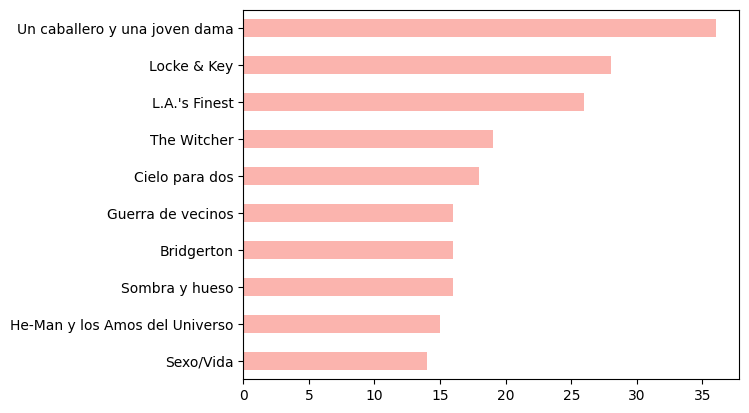

In [ ]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

In [ ]:
df[df.Title.str.contains('Resident')]

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2022-07-16,Resident Evil: Revelaciones,pelicula,Resident Evil,Revelaciones,None,None,None,2022,July,16,Saturday
2022-07-16,Resident Evil: Parásito,pelicula,Resident Evil,Parásito,None,None,None,2022,July,16,Saturday
2022-07-16,Resident Evil: La nenita de alguien,pelicula,Resident Evil,La nenita de alguien,None,None,None,2022,July,16,Saturday
2022-07-16,Resident Evil: Nostalgia,pelicula,Resident Evil,Nostalgia,None,None,None,2022,July,16,Saturday
2022-07-15,Resident Evil: El cambio,pelicula,Resident Evil,El cambio,None,None,None,2022,July,15,Friday
2022-07-15,Resident Evil: La luz,pelicula,Resident Evil,La luz,None,None,None,2022,July,15,Friday
2022-07-15,Resident Evil: Malo conocido,pelicula,Resident Evil,Malo conocido,None,None,None,2022,July,15,Friday
2022-07-15,Resident Evil: Bienvenidos a Nueva Raccoon City,pelicula,Resident Evil,Bienvenidos a Nueva Raccoon City,None,None,None,2022,July,15,Friday
2021-09-07,Resident Evil: La tiniebla infinita: Episodio 1,serie,Resident Evil,La tiniebla infinita,Episodio 1,None,None,2021,September,7,Tuesday


Que dia de la semana ve mas series?

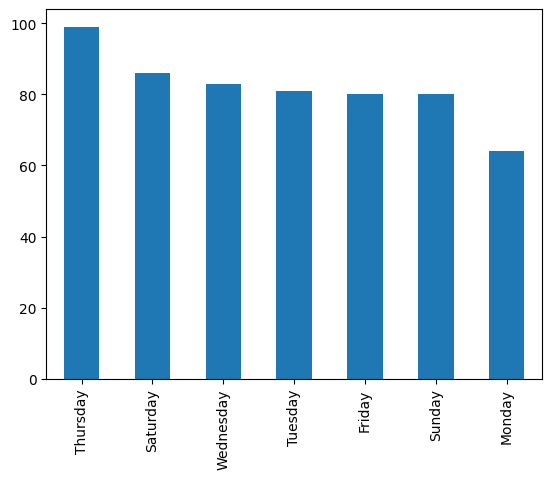

In [ ]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

Existen diferencias en cuando ve Series o Peliculas?

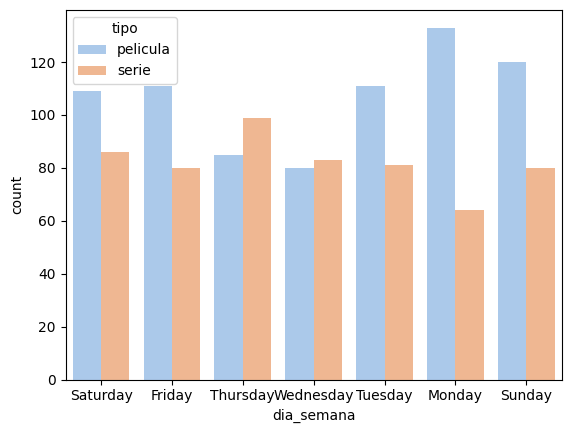

In [ ]:
import seaborn as sns

sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

Cual es el consumo por mes?

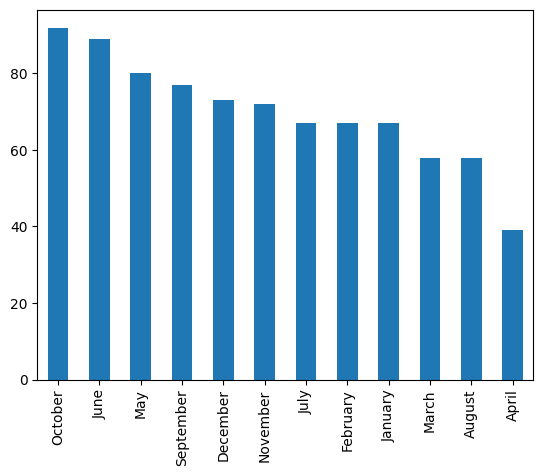

In [ ]:
df.loc[df.año < 2023].mes.value_counts().plot.bar();

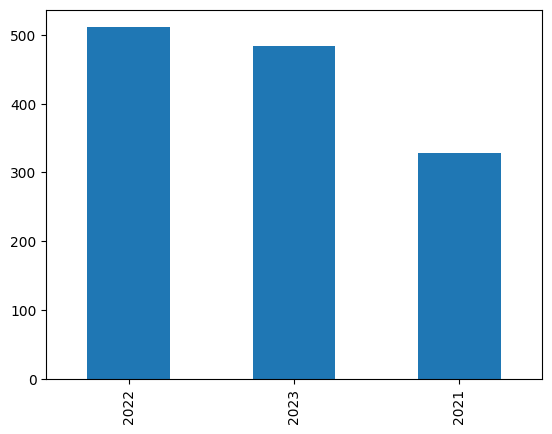

In [ ]:
df.año.value_counts().plot.bar();